In [ ]:
from langchain_core.runnables import Runnable
from langchain_groq import ChatGroq
from langchain_core.language_models.chat_models import BaseChatModel
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from functools import lru_cache
from pydantic import SecretStr

from loma_tutor.config import settings
from loma_tutor.domain.prompts import (
    QA_GENERATION_SYSTEM_PROMPT,
    QA_GENERATION_USER_PROMPT,
    TUTOR_GREETING_SYSTEM_PROMPT,
    TUTOR_GREETING_USER_PROMPT,
    TUTOR_RESPONSE_SYSTEM_PROMPT,
    TUTOR_RESPONSE_USER_PROMPT,
)
from loma_tutor.application.conversation.schemas import (
    QAList
)
from loma_tutor.application.conversation.chains import get_chat_model, get_qa_generation_chain

from loma_tutor.application.conversation.graph import graph

In [2]:
from langchain.globals import set_debug

set_debug(True)

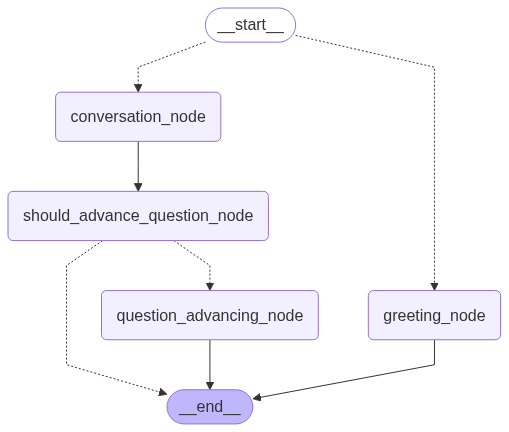

In [3]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
topic = "Linked Lists"

In [ ]:
chain = get_qa_generation_chain()

In [ ]:
response = chain.invoke(input={"topic": topic, "num_questions": 5})

In [ ]:
response

In [ ]:
questions = response['qa_pairs']
questions

In [ ]:
from loma_tutor.application.conversation.chains import get_tutor_greeting_chain, get_tutor_response_chain

greeting_chain = get_tutor_greeting_chain()
response_chain = get_tutor_response_chain()

In [ ]:
response = greeting_chain.invoke(input={"topic": topic, "first_question": questions[0]["question"]})

In [ ]:
greeting_message = response.content
print(greeting_message)

In [ ]:
messages = [
    ("ai", greeting_message),
    ("human", """In a singly linked list, you can't go backward because each node only holds a pointer to the next node in the chain, not the one before it. 
                This makes it really hard to do something like delete a node, because you can't get to the previous node to change its "next" pointer, so you just have to use a different data structure instead.""")
]

In [ ]:
response = response_chain.invoke(input={"topic": topic, "messages": messages, "original_question": questions[0]["question"], "updated_answer_requirements": questions[0]["answer_requirements"]})

In [ ]:
response